In [1]:
import numpy as np
from scipy import signal
from scipy import fftpack
from matplotlib import pyplot as plt
from crawlab_toolbox import plotting

In [2]:
def create_noisy_signal(
    numPoints, samplingRate, frequencies, amplitudes,
    noiseStDev, phase=0, offset=0,
    frequencyError=0.05, harmonics=1,
    saveSignal=False,fileName='signal'):
    '''
    create_noisy_signal

    Create a signal with desired randomness and spectral qualities.

    Inputs:
        - duration: time (in seconds) captured by the signal
        - samplingRate: rate (in Hz) of the signal
        - frequencies: list of frequencies in the signal
        - amplitudes: amplitudes of the corresponding frequencies
        - (float) noiseStDev: standard deviation squared) of
                the gaussian noise added to the signal
        - (float) frequencyStDev: standard deviation
                of the gaussian noise added to the frequency
        - (float) amplitudeStDev: standard deviation
                of the gaussian noise added to the amplitudes
        - (float) phaseStDev: StDev (standard deviation squared) of
                the gaussian noise added to the phase of the signal

    '''

    # determine the required number of datapoints to cover the duration
    # at the required sampling rate
#     numPoints = int(duration * samplingRate)

    # Create a time array with the correct start and endpoint, sampled at
    # the required sampling rates
#     time = np.atleast_2d(np.linspace(0,duration,numPoints))
    time = np.atleast_2d(np.cumsum(np.ones(numPoints) / samplingRate))

    # Ensure that all of the inputs are cast as numpy arrays
    freqs = np.atleast_2d(np.asarray(frequencies).flatten()).T
    amps = np.atleast_2d(np.asarray(amplitudes).flatten()).T
    noiseStDev = np.asarray(noiseStDev)

    # Modify the signal slightly
    m, n = freqs.shape
#     phase = np.atleast_2d(phaseStDev * np.random.random((m, n)))

    # Create randomly distributed noise with a given standard deviation
    noise = noiseStDev * np.random.random(numPoints)

    # The number of input frequencies must be identical to the number
    # of input amplitudes
    if len(freqs) != len(amps):
        raise ValueError('Length of input frequencies must be identical to\
                          that of input amplitudes')

    signal = np.sum(amps * np.sin(2 * np.pi * freqs * time + phase), axis=0) + noise + offset

    if saveSignal:
        fName = fileName + '.txt'
        timeName = fileName + '_time.txt'
        np.savetxt(fName, np.round(signal,6), header='Signal', delimiter=',')
        np.savetxt(timeName, np.round(time,6), header='Time (s)', delimiter=',')

    return time.flatten(), signal

In [3]:
numPoints = 1024
samplingRate = 1024
averagePoints = 256
thisFreq = [64,]
thisAmp = [1]
thisNoise = 1.
offset = 0.


In [4]:
timeSampled,mySignal = create_noisy_signal(numPoints,samplingRate,thisFreq,thisAmp,thisNoise,offset=offset)
time,trueSignal = create_noisy_signal(numPoints*50,samplingRate*50,thisFreq,thisAmp,thisNoise,offset=offset)

sampledSignal = np.interp(time, timeSampled, mySignal, left=None, right=None, period=None)

averagedSignal = mySignal.reshape(averagePoints,4)

In [43]:
raw_fft = fftpack.fft(mySignal)
raw_fft = (raw_fft * raw_fft.conj()).real
# raw_fft_averaged = fftpack.fft(averagedSignal,axis=0)
raw_fft_averaged = fftpack.fft(averagedSignal[:,0])
raw_fft_averaged = (raw_fft_averaged * raw_fft_averaged.conj()).real
# raw_fft_averaged = np.mean(raw_fft_averaged,axis=1)

print(raw_fft_averaged.shape)
print(raw_fft.shape)

print(raw_fft.shape[0])

freq = np.fft.fftfreq(raw_fft.shape[0]) * samplingRate

print(raw_fft_averaged.shape[0])
print(np.amax(freq))

freq_averaged = np.fft.fftfreq(raw_fft_averaged.shape[0]) * samplingRate

print(np.amax(freq_averaged))



(256,)
(1024,)
1024
256
511.0
508.0


In [44]:
raw_fft_averaged.shape[0]

256

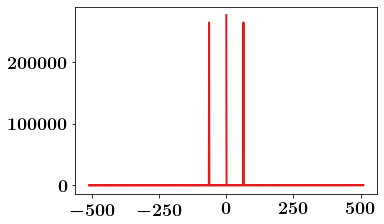

In [45]:
plt.plot(freq,raw_fft)
plt.show()

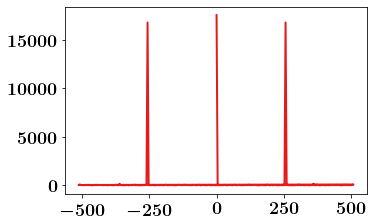

In [46]:
plt.plot(freq_averaged,raw_fft_averaged)

In [21]:

fft_averaged = np.interp(freq[:numPoints//2],freq_averaged[:averagePoints//2],raw_fft_averaged[:averagePoints//2])

fft = (raw_fft * raw_fft.conj()).real
fft = fft[:numPoints//2]
freq = freq[:numPoints//2]

1024
512
511.0
510.0


In [36]:
freq_averaged

array([   0.,    2.,    4.,    6.,    8.,   10.,   12.,   14.,   16.,
         18.,   20.,   22.,   24.,   26.,   28.,   30.,   32.,   34.,
         36.,   38.,   40.,   42.,   44.,   46.,   48.,   50.,   52.,
         54.,   56.,   58.,   60.,   62.,   64.,   66.,   68.,   70.,
         72.,   74.,   76.,   78.,   80.,   82.,   84.,   86.,   88.,
         90.,   92.,   94.,   96.,   98.,  100.,  102.,  104.,  106.,
        108.,  110.,  112.,  114.,  116.,  118.,  120.,  122.,  124.,
        126.,  128.,  130.,  132.,  134.,  136.,  138.,  140.,  142.,
        144.,  146.,  148.,  150.,  152.,  154.,  156.,  158.,  160.,
        162.,  164.,  166.,  168.,  170.,  172.,  174.,  176.,  178.,
        180.,  182.,  184.,  186.,  188.,  190.,  192.,  194.,  196.,
        198.,  200.,  202.,  204.,  206.,  208.,  210.,  212.,  214.,
        216.,  218.,  220.,  222.,  224.,  226.,  228.,  230.,  232.,
        234.,  236.,  238.,  240.,  242.,  244.,  246.,  248.,  250.,
        252.,  254.,

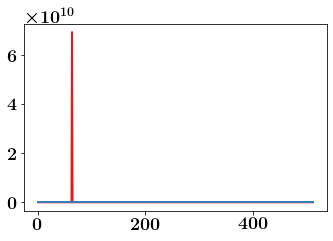

In [23]:
plt.plot(freq[1:numPoints//2],fft[1:])
plt.plot(freq[1:numPoints//2],fft_averaged[1:])

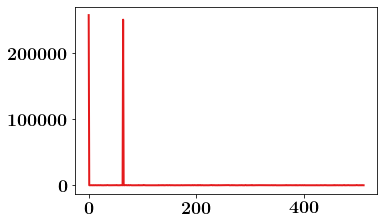

In [81]:
plt.plot(freq,fft)
# plt.plot(freq,fft_averaged)

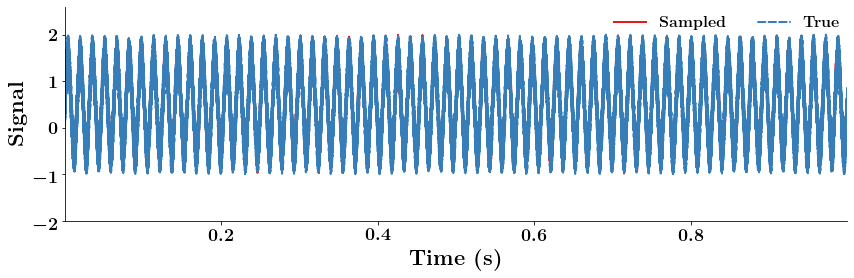

In [11]:

# responses = np.vstack((raw_fft.real,raw_fft.imag,(raw_fft * raw_fft.conj()).real))
responses = np.vstack((sampledSignal,trueSignal))
plotting.generate_plot(time,responses,
                         ['Sampled','True'],'Time (s)','Signal',showplot=True,
                         template='wide',
                         ymax=0.2,
                         save_plot=True,
                         transparent=True,
                         num_col=2,
                         folder='Figures/FFT_Example',
                         filename='raw_Signal_3',
                         file_type='png')



(2, 512)


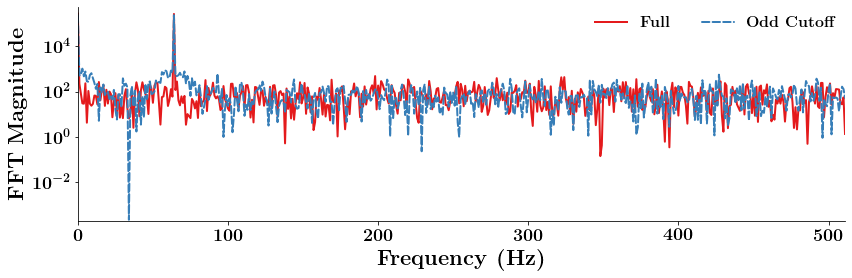

(1024,)
(1024,)
(2, 511)


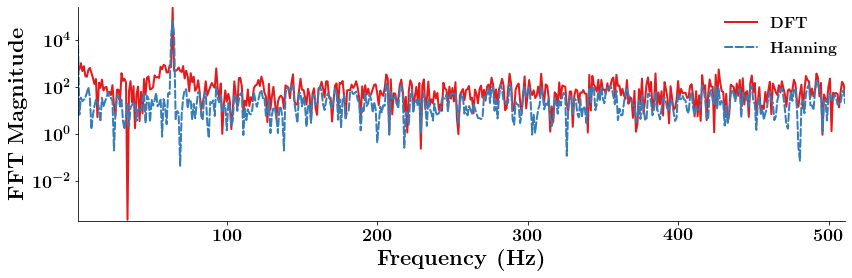

In [12]:

freq = np.fft.fftfreq(mySignal.shape[0]) * samplingRate
freq_odd = np.fft.fftfreq(mySignal_odd.shape[0]) * samplingRate




even_fft = ((raw_fft * raw_fft.conj()).real)[:int(np.ceil(raw_fft.shape[0] / 2))]
odd_fft = ((raw_fft_odd * raw_fft_odd.conj()).real)[:int(np.ceil(raw_fft_odd.shape[0] / 2))]
responses = np.vstack((even_fft,odd_fft))

print(responses.shape)
plotting.generate_plot(freq[:int(np.ceil(raw_fft.shape[0] / 2))],responses,
                         ['Full','Odd Cutoff'],'Frequency (Hz)','FFT Magnitude',showplot=True,
                         template='wide',
                         save_plot=True,
                         transparent=True,
                         ymax = 1,
                         num_col=2,
                         log_y=True,
                         folder='Figures/FFT_Example',
                         filename='Raw_FFT_Physical_Leakage',
                         file_type='png')


freq= np.fft.fftfreq(fullSignal_odd.shape[0]) * samplingRate
odd_fft = (raw_fft_odd * raw_fft_odd.conj()).real
odd_fft_hanning = (raw_fft_odd_hanning * raw_fft_odd_hanning.conj()).real

print(odd_fft.shape)
print(odd_fft_hanning.shape)
responses = np.vstack((odd_fft,odd_fft_hanning))[:,1:int(np.ceil(raw_fft_odd.shape[0] / 2))]

print(responses.shape)
plotting.generate_plot(freq[1:int(np.ceil(raw_fft_odd.shape[0] / 2))],responses,
                         ['DFT','Hanning'],'Frequency (Hz)','FFT Magnitude',showplot=True,
                         template='wide',
                         save_plot=True,
                         transparent=True,
                         num_col=1,
                         log_y=True,
                         folder='Figures/FFT_Example',
                         filename='Raw_FFT_Physical_Window',
                         file_type='png')
